Text box info: JEWEL2.2 $\rm T_RENTo$ + vUSPhydro
$\sqrt{s_{NN}}$ = 2.76 TeV
Anti-$k_t$ R = 0.4
PbPb 0-10\%
Recoils On
Text box info: JEWEL2.2 $\rm T_RENTo$ + vUSPhydro
$\sqrt{s_{NN}}$ = 2.76 TeV
Anti-$k_t$ R = 0.4
PbPb 0-10\%
Recoils On


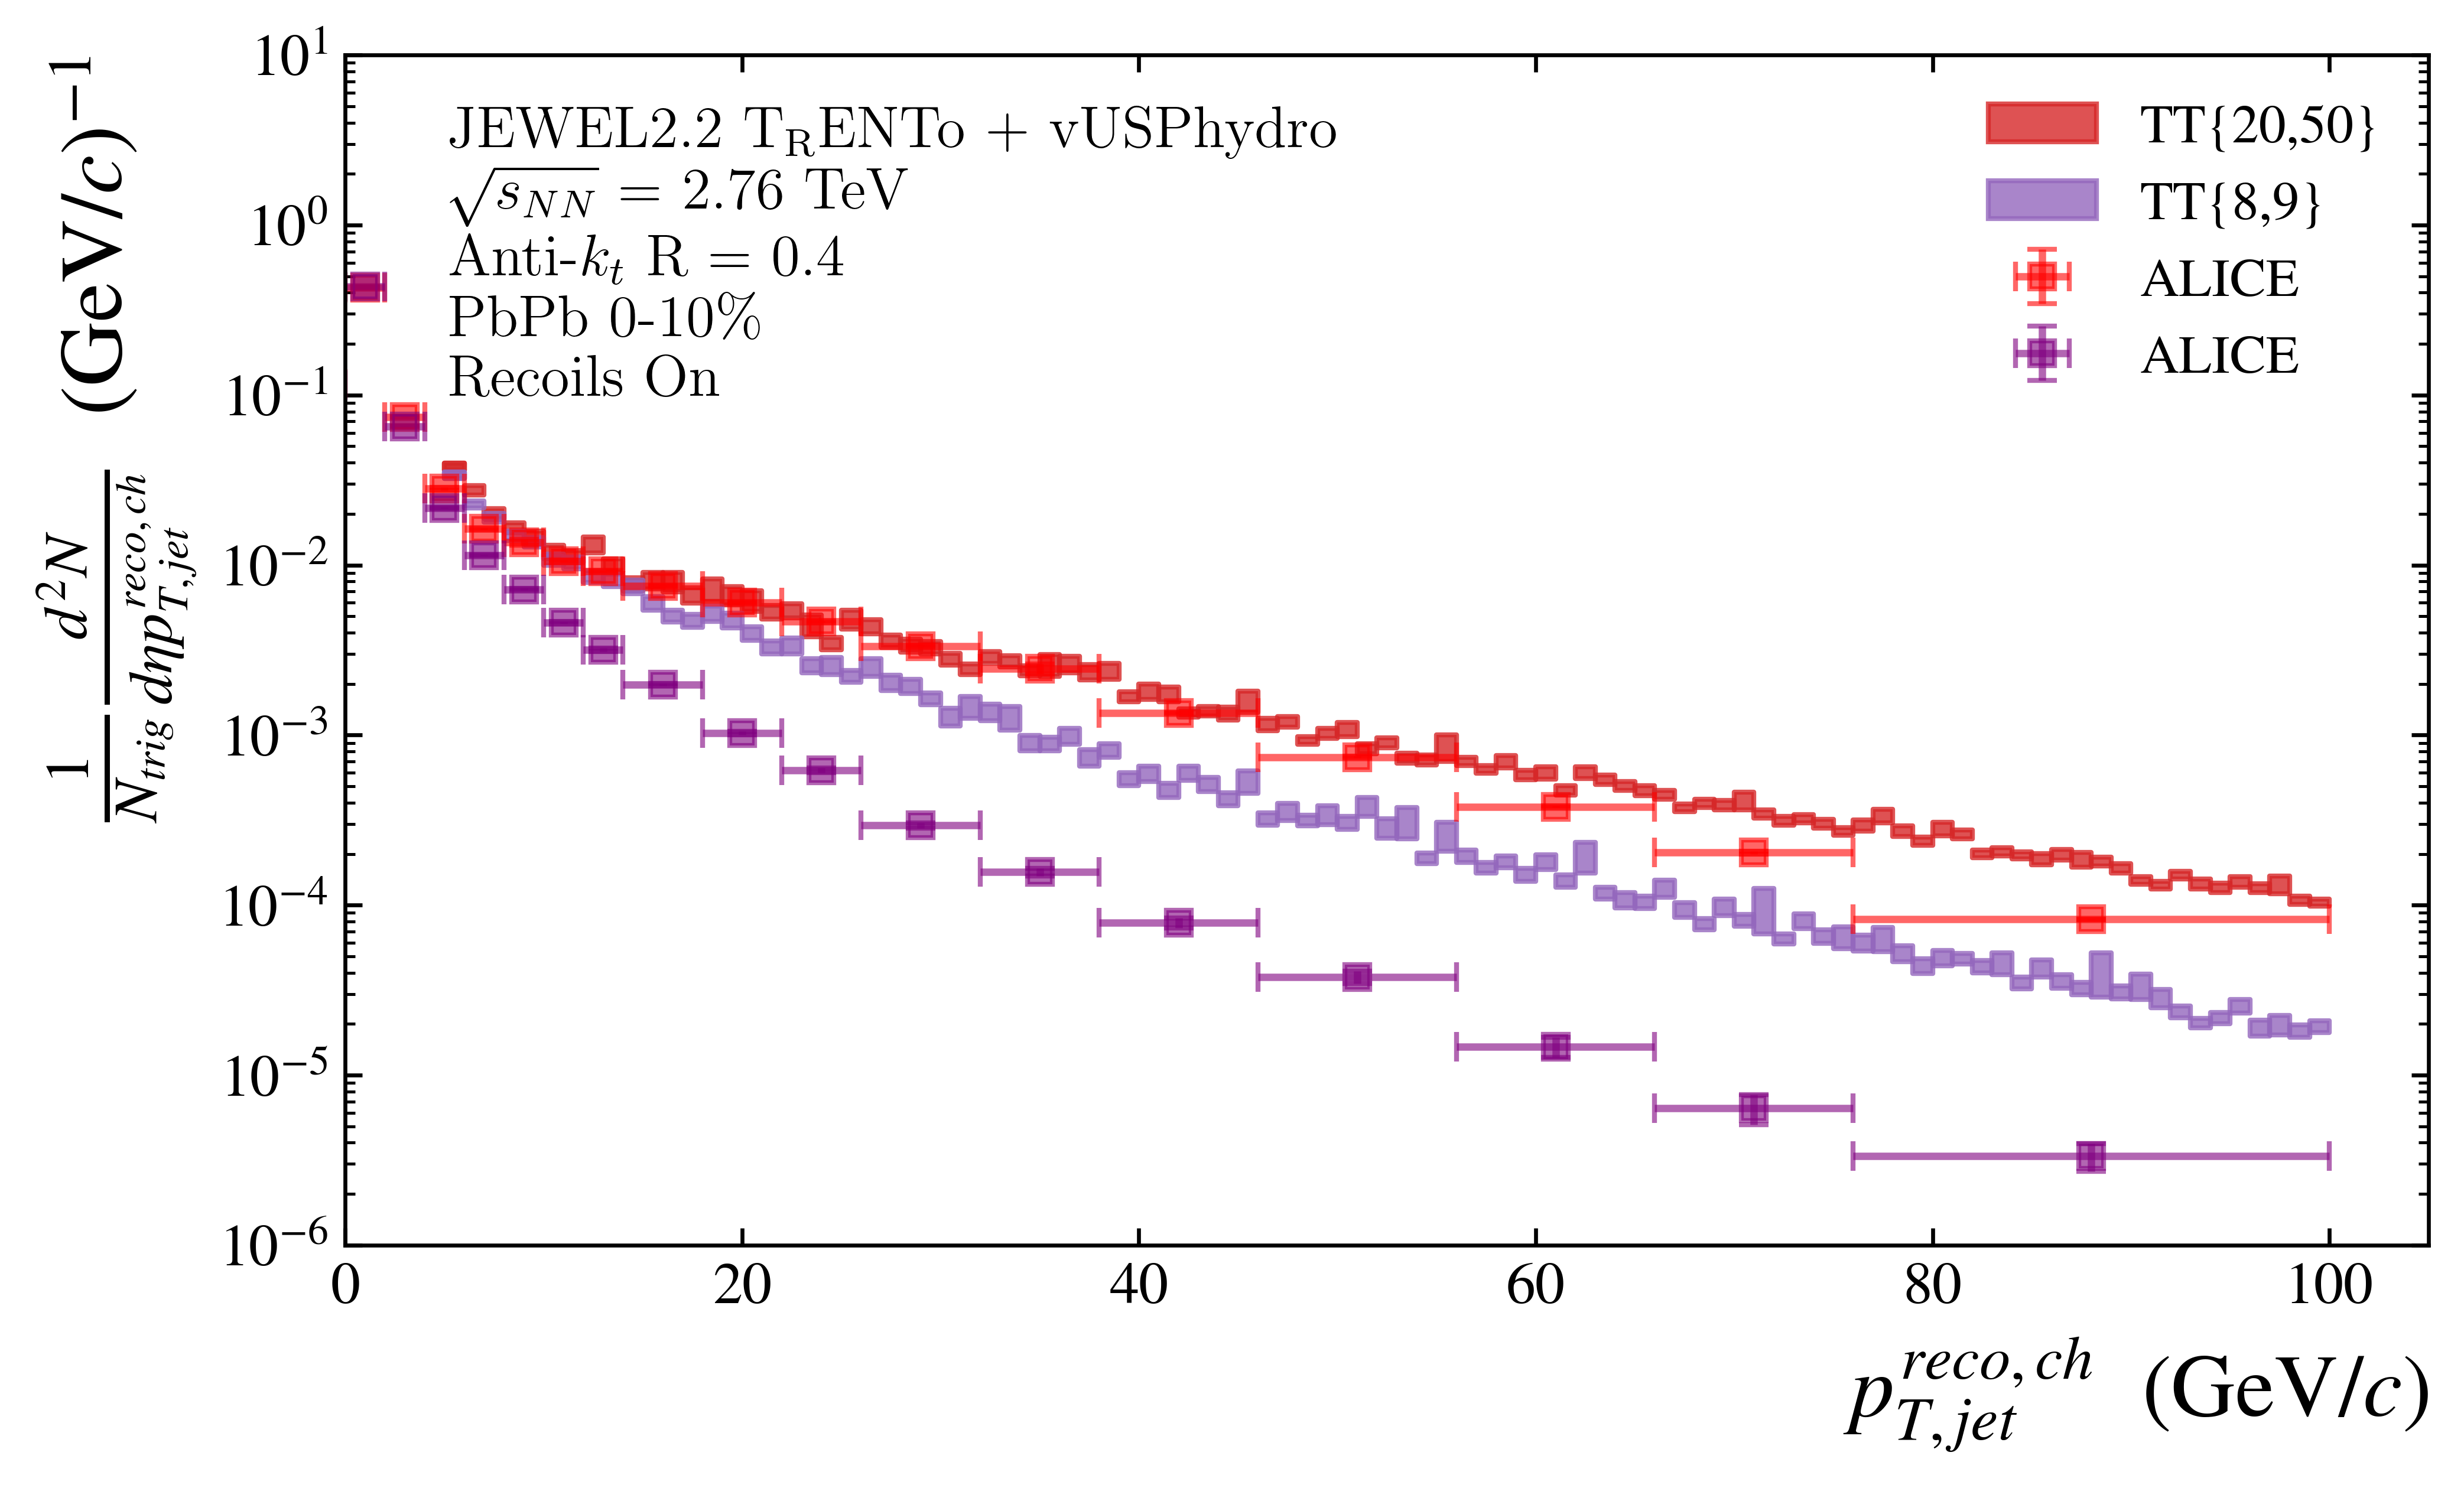

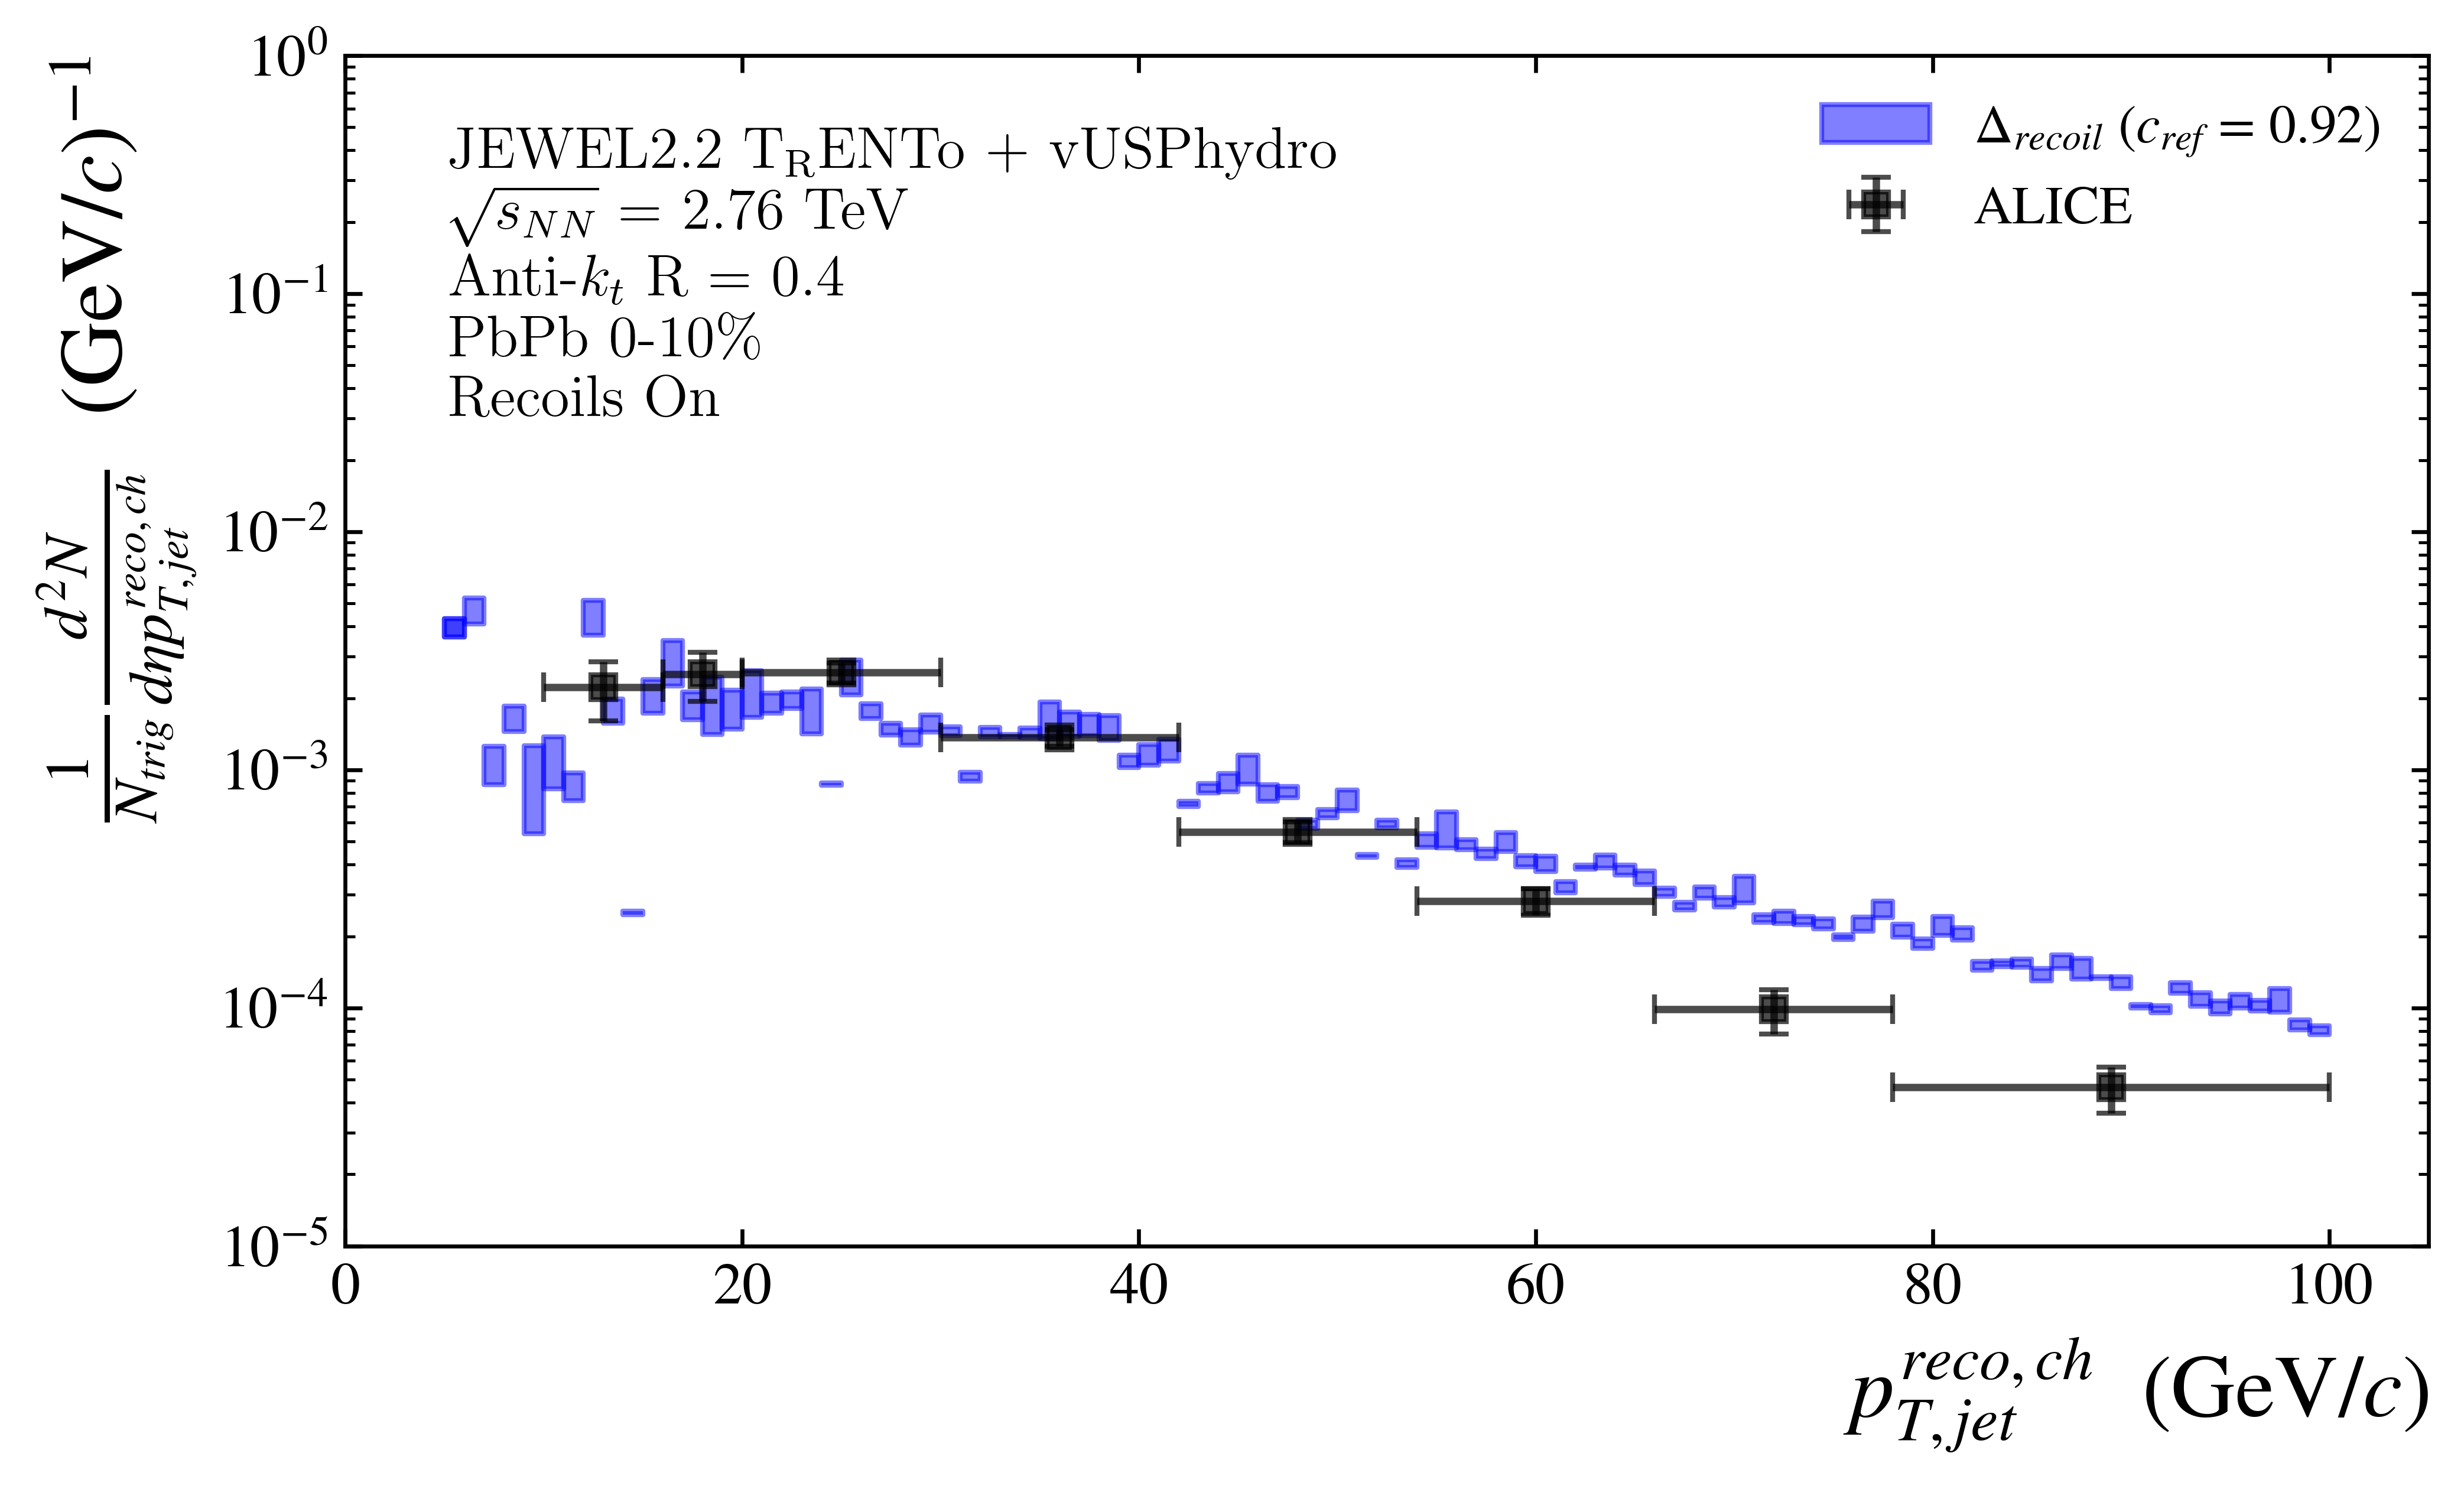

In [18]:
# JEWEL 2.2
# Gráficos para hjet Default reoff
import jetfunc
import yoda
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
from scipy.interpolate import make_interp_spline, BSpline

import os

#função para fazer o gráfico dos dados experimentais do ALICE
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        max = len(data.xVals()) + 1

    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]



plt.style.use('plotconfig.mplstyle')


# Useful documentation:
# YODA: https://yoda.hepforge.org/pydoc/
# MATPLOTLIB: https://matplotlib.org/
# NUMPY: https://numpy.org/doc/

# Don't forget to load necessary packages in SAMPA
# source /cvmfs/alice.cern.ch/etc/login.sh
# eval `alienv printenv VO_ALICE@Rivet::2.7.2-alice2-1`


model = 4

#Diretorio para yoda file
output_02 = '/home/monalisa/Desktop/Mestrado/semi-inclusive+h-jet/Matplotlib_hjet/yoda_merge/vTj2-2Twrec_h/0-10_hjet_R0.2.yoda'
output_04 = '/home/monalisa/Desktop/Mestrado/semi-inclusive+h-jet/Matplotlib_hjet/yoda_merge/vTj2-2Twrec_h/0-10_hjet_R0.4.yoda'
output_05 = '/home/monalisa/Desktop/Mestrado/semi-inclusive+h-jet/Matplotlib_hjet/yoda_merge/vTj2-2Twrec_h/0-10_hjet_R0.5.yoda'


obs_ntrig = ['/USPJWL_HJET/hNtrig_20_50_R0.2', '/USPJWL_HJET/hNtrig_8_9_R0.2',
             '/USPJWL_HJET/hNtrig_1_R0.2','/USPJWL_HJET/hNtrig_eta_R0.2']

obs_jet = ['/USPJWL_HJET/Njet_20_50_R0.2','/USPJWL_HJET/Njet_8_9_R0.2',
           '/USPJWL_HJET/Njet_1_R0.2','/USPJWL_HJET/Njet_eta_R0.2']


obs_ntrig = ['/USPJWL_HJET/hNtrig_20_50_R0.4', '/USPJWL_HJET/hNtrig_8_9_R0.4',
             '/USPJWL_HJET/hNtrig_1_R0.4','/USPJWL_HJET/hNtrig_eta_R0.4']

obs_jet = ['/USPJWL_HJET/Njet_20_50_R0.4','/USPJWL_HJET/Njet_8_9_R0.4',
           '/USPJWL_HJET/Njet_1_R0.4','/USPJWL_HJET/Njet_eta_R0.4']


obs_ntrig = ['/USPJWL_HJET/hNtrig_20_50_R0.5', '/USPJWL_HJET/hNtrig_8_9_R0.4',
             '/USPJWL_HJET/hNtrig_1_R0.5','/USPJWL_HJET/hNtrig_eta_R0.4']

obs_jet = ['/USPJWL_HJET/Njet_20_50_R0.5','/USPJWL_HJET/Njet_8_9_R0.5',
           '/USPJWL_HJET/Njet_1_R0.5','/USPJWL_HJET/Njet_eta_R0.5']




histos = yoda.read(output)

minpt = 5

arrj20_50_02 = []
arrj8_9_02 = []
arrj20_50_04 = []
arrj8_9_04 = []
arrj20_50_05 = []
arrj8_9_05 = []

for i in range(len(obs_ntrig)):
    
    Ntrig = histos[str(obs_ntrig[i])]   
    Njet = histos[str(obs_jet[i])]
    
    x = np.asarray(Ntrig.xVals())
    y = np.asarray(Ntrig.yVals())
    yerr = np.asarray((Ntrig.yMaxs() - Ntrig.yMins()) / 2)
    xerr = np.asarray((Ntrig.xMaxs() - Ntrig.xMins()) / 2)

    
    arr = [x,y,yerr,xerr]
    
    #Norm = (x @ y)
    Norm = Ntrig.sumW() 




    #Njet.rebin(2)
    xj = np.asarray(Njet.xVals())
    yj = np.asarray(Njet.yVals()/Norm)
    yerrj = np.asarray((Njet.yMaxs() - Njet.yMins()) / (2*Norm))
    xerrj = np.asarray((Njet.xMaxs() - Njet.xMins()) / 2)

    arrj = [xj,yj,yerrj,xerrj]
    
    
    if (i==0):
        arrj20_50 = arrj
        
    if (i==1):
        arrj8_9 = arrj 
    
    if (i == 0):
    

        for k in range(minpt, arrj20_50_02[0].size):
            xhigh = arrj20_50_02[0][k] + arrj20_50_02[3][k]
            xlow = arrj20_50_02[0][k] - arrj20_50_02[3][k]
            yhigh = arrj20_50_02[1][k] + arrj20_50_02[2][k]
            ylow = arrj20_50_02[1][k] - arrj20_50_02[2][k]
            if (k == minpt):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='tab:red', label='TT{20,50}')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='tab:red')
            
        #Plot dos dados experimentais            
        ALICE = DataFromExperiment('HEPData/HEPData-ins1376027-v1-Table_4_TT2050.yoda', '/REF/ALICE_2015_I1376027/d04-x01-y01')

        plt.errorbar(*ALICE, color='r', fmt='s', ms=5, elinewidth = 1.5, capsize = 3, capthick = 1, alpha=0.6, label='ALICE')
        plt.legend(ncol=2,frameon = 0)
        
       
        
    if (i == 1):
                

        for k in range(minpt, arrj8_9[0].size):
            xhigh = arrj8_9[0][k] + arrj8_9[3][k]
            xlow = arrj8_9[0][k] - arrj8_9[3][k]
            yhigh = arrj8_9[1][k] + arrj8_9[2][k]
            ylow = arrj8_9[1][k] - arrj8_9[2][k]
            if (k == minpt):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='tab:purple', label='TT{8,9}')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.8, color='tab:purple')
            
        #Plot dos dados experimentais            
        ALICE = DataFromExperiment('HEPData/HEPData-ins1376027-v1-Table_3_TT89.yoda', '/REF/ALICE_2015_I1376027/d03-x01-y01')

        plt.errorbar(*ALICE, color='purple', fmt='s', ms=5, elinewidth = 1.5, capsize = 3, capthick = 1, alpha=0.6, label='ALICE')
        plt.legend(ncol=2,frameon = 0)



    plt.yscale('log') 
    #plt.xscale('log')
    plt.xlabel(r'$p^{reco,ch}_{T,jet}$' '  (GeV/$c$)',fontsize=18, loc = 'right')
    plt.ylabel(r'$\frac{1}{N_{trig}}\frac{d^2N}{d\eta p^{reco,ch}_{T,jet}}$' '  (GeV/$c$)$^{-1}$', fontsize=18, loc = 'top')
    #plt.title('JEWEL+PYTHIA T$_R$ENTo+v-USPhydro', loc='left', fontsize = 14)
    #plt.text(5,2,'PbPb 0-10% $\sqrt{s_{NN}}$ = 2.76 TeV')
    #plt.text(5,0.4,'R = 0.4')
    plt.legend(frameon = 0)
    #plt.text(5,0.1,'Recoils On')
    #plt.text(90,0.75E-2,'$\eta$ < 0.9')
    plt.ylim(1E-6,10)
    plt.xlim(0,105)
    #plt.title('')
    if (i == 0):
        jetfunc.TextBoxInfo(0, 0.4, r'PbPb 0-10\%' + '\n' + 'Recoils On', 0, 0, model, energy=2.76, lead=0)

    # Save
    plt.savefig('Graphs/vTj2-2Twrec_hjet.pdf')
        


plt.figure(2)
for i in range(len(obs_ntrig)):
    
    Ntrig = histos[str(obs_ntrig[i])]   
    Njet = histos[str(obs_jet[i])]
    
    x = np.asarray(Ntrig.xVals())
    y = np.asarray(Ntrig.yVals())
    yerr = np.asarray((Ntrig.yMaxs() - Ntrig.yMins()) / 2)
    xerr = np.asarray((Ntrig.xMaxs() - Ntrig.xMins()) / 2)

    
    arr = [x,y,yerr,xerr]
    
    #Norm = (x @ y)
    Norm = Ntrig.sumW() 




    #Njet.rebin(2)
    xj = np.asarray(Njet.xVals())
    yj = np.asarray(Njet.yVals()/Norm)
    yerrj = np.asarray((Njet.yMaxs() - Njet.yMins()) / (2*Norm))
    xerrj = np.asarray((Njet.xMaxs() - Njet.xMins()) / 2)

    arrj = [xj,yj,yerrj,xerrj]
    
    
    if (i==0):
        arrj20_50 = arrj
        
    if (i==1):
        arrj8_9 = arrj 
    

    if (i == 1):
        
        c = 0.96
        
        for k in range(minpt, arrj8_9[0].size):
            xhigh = arrj8_9[0][k] + arrj8_9[3][k]
            xlow = arrj8_9[0][k] - arrj8_9[3][k]
            yhigh = np.absolute(-c*(arrj8_9[1][k] + arrj8_9[2][k])+c*(arrj20_50[1][k] + arrj20_50[2][k]))
            ylow = np.absolute(-c*(arrj8_9[1][k] - arrj8_9[2][k])+c*(arrj20_50[1][k] - arrj20_50[2][k]))
            if (k == minpt):
                plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.5, color='blue', label='$\Delta_{recoil}$ ($c_{ref}$ = 0.92)')
            plt.fill_between([xlow, xhigh], ylow, yhigh, alpha=0.5, color='blue')
            
        #Plot dos dados experimentais            
        ALICE = DataFromExperiment('HEPData/HEPData-ins1376027-v1-Table_18.yoda', '/REF/ALICE_2015_I1376027/d18-x01-y01')

        plt.errorbar(*ALICE, color='black', fmt='s', ms=5, elinewidth = 1.5, capsize = 3, capthick = 1, alpha=0.7, label='ALICE')
        plt.legend(frameon = 0)


    plt.yscale('log') 
    #plt.xscale('log')
    plt.xlabel(r'$p^{reco,ch}_{T,jet}$' '  (GeV/$c$)',fontsize=18, loc = 'right')
    plt.ylabel(r'$\frac{1}{N_{trig}}\frac{d^2N}{d\eta p^{reco,ch}_{T,jet}}$' '  (GeV/$c$)$^{-1}$', fontsize=18, loc = 'top')
    #plt.title('JEWEL+PYTHIA T$_R$ENTo+v-USPhydro', loc='left', fontsize = 14)
    #plt.text(5,2,'PbPb 0-10% $\sqrt{s_{NN}}$ = 2.76 TeV')
    #plt.text(5,0.4,'R = 0.4')
    #plt.legend(frameon = 0)
    #plt.text(5,0.1,'Recoils On')
    #plt.text(90,0.75E-2,'$\eta$ < 0.9')
    plt.ylim(1E-5,1)
    plt.xlim(0,105)
    #plt.title('')
    if (i == 0):
        jetfunc.TextBoxInfo(0, 0.4, r'PbPb 0-10\%' + '\n' + 'Recoils On', 0, 0, model, energy=2.76, lead=0)

    # Save
    plt.savefig('Graphs/delta_vTj2-2Twrec_hjet.pdf')
        



        
    